In [1]:
import plotly.express as px

def generate_float(bin, num_exponent_bits):
    if isinstance(bin, str):
        bin= bin.replace(" ", "")
    else:
        bin = ''.join(list(map(str, bin)))
    neb = num_exponent_bits
    exp= bin[1:neb+1]
    mantissa = bin[neb+1:]
    exp_sub = 2**(neb-1) - 1
    num_mantissa= len(mantissa)
    lead_bit = "1" if int(exp)>0 else "0"
    return (2**(int(exp, 2) - exp_sub))*(int(lead_bit+mantissa, 2)*2**(-num_mantissa))

generate_bf16 = lambda x: generate_float(x, num_exponent_bits=8)
generate_fp16 = lambda x: generate_float(x, num_exponent_bits=5)
generate_fp32 = lambda x: generate_float(x, num_exponent_bits=8)
num = generate_bf16("0111111101111111")
print(f"{num:.4e}")

3.3895e+38


In [2]:
num = generate_fp16("0 00000 0000000000")
print(f"{num: .4e}")

 0.0000e+00


In [3]:
generate_fp16("0 00001 0000000000")

6.103515625e-05

In [4]:
generate_bf16("0 01111 0000000000")

0.0078125

In [81]:
(2**32)

4294967296

In [80]:
(2**16)

65536

In [32]:
import numpy as np

fp32_vecs = np.random.randint(low=0, high=2, size=(100_000, 32))
# fp32_vecs = fp32_vecs[fp32_vecs[:, 0] == 0]
fp32_values = list(map(generate_fp32, fp32_vecs))

bf16_vecs = np.random.randint(low=0, high=2, size=(100_000, 16))
# bf16_vecs = bf16_vecs[bf16_vecs[:, 0] == 0]
bf16_values = list(map(generate_bf16, bf16_vecs))


fp16_vecs = np.random.randint(low=0, high=2, size=(100_000, 16))
# fp16_vecs = fp16_vecs[fp16_vecs[:, 0] == 0]
fp16_values = list(map(generate_fp16, fp16_vecs))

In [33]:
len(fp32_values)

49994

In [34]:
import pandas as pd

df =pd.DataFrame({"Values": np.concatenate([np.log2(fp32_values), np.log2(bf16_values), np.log2(fp16_values)]), 
                  "Format": ["FP32"]*len(fp32_values) + ["BF16"]*len(bf16_values) + ["FP16"]*len(fp16_values)})

fig = px.histogram(df, x="Values", color="Format", nbins=100)
fig.show()

/var/folders/by/h0n9lgfj6hvbgnrtqpnwqymm0000gn/T/ipykernel_42216/1085473776.py:3: RuntimeWarning:

divide by zero encountered in log2



/var/folders/by/h0n9lgfj6hvbgnrtqpnwqymm0000gn/T/ipykernel_42216/1683442076.py:4: RuntimeWarning:

divide by zero encountered in log2

findfont: Font family 'times-new-roman' not found.
findfont: Font family 'times-new-roman' not found.
findfont: Font family 'times-new-roman' not found.
findfont: Font family 'times-new-roman' not found.
findfont: Font family 'times-new-roman' not found.


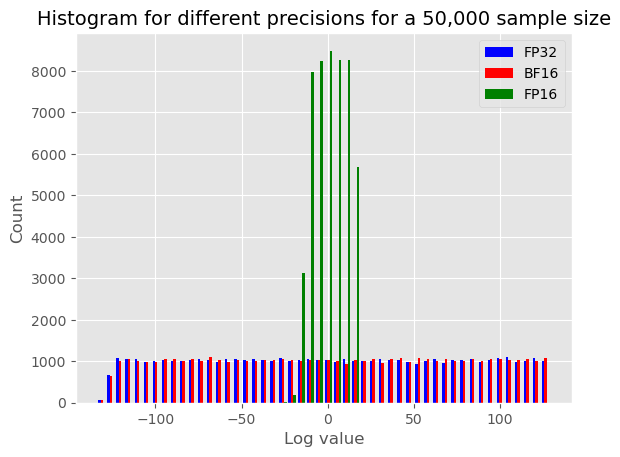

In [40]:
import matplotlib.pyplot as plt

log_fp32= np.log2(fp32_values)
log_fp16 = np.log2(fp16_values)
log_bf16 = np.log2(bf16_values)
for val in (log_fp32, log_bf16, log_fp16):
    val[val == -np.inf] = 1e-20
plt.hist([log_fp32, log_bf16, log_fp16], bins=50, label=["FP32", "BF16", "FP16"], color=["blue", "red", "green"])
plt.style.use('ggplot')
fontdict = {'family': 'times-new-roman', 'color': 'black', 'size': 14}
plt.title('Histogram for different precisions for a 50,000 sample size', fontdict=fontdict)
plt.xlabel('Log value')
plt.legend(loc="upper right")
plt.ylabel('Count')
plt.show()

In [29]:
len(log_bf16)

499988

In [30]:
len(log_fp16)

499774

In [31]:
len(log_fp32)

499645

In [42]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame({"Memory": [26, 26, 156], "Part": ["Weights", "Gradients", "Optimizer"]})
fig = px.bar(df, x="Part", y="Memory")
fig.
fig.show()

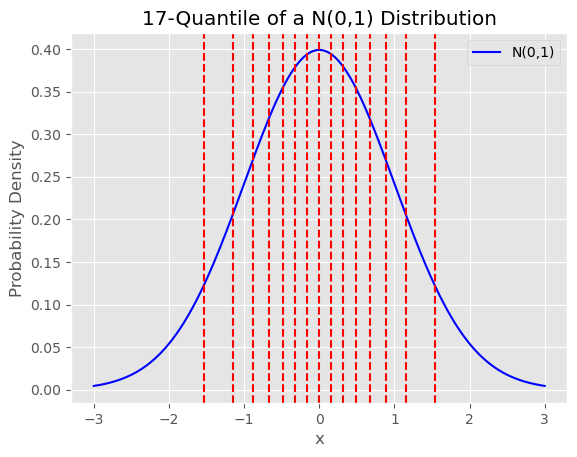

array([       -inf, -1.53412054, -1.15034938, -0.88714656, -0.67448975,
       -0.48877641, -0.31863936, -0.15731068,  0.        ,  0.15731068,
        0.31863936,  0.48877641,  0.67448975,  0.88714656,  1.15034938,
        1.53412054,         inf])

In [46]:
from scipy.stats import norm

# Recalculating the quantile points for 17-quantile (which needs 16 points)
new_quantile_points = norm.ppf(np.linspace(0, 1, 17))

# Generating a normal distribution N(0,1)
x = np.linspace(-3, 3, 1000)
y = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

# Plotting the normal distribution again
plt.plot(x, y, label='N(0,1)', color="b")

# Adding vertical lines for the recalculated quantiles
for q in new_quantile_points:
    plt.axvline(x=q, color='r', linestyle='--')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('17-Quantile of a N(0,1) Distribution')
plt.legend()
plt.show()

new_quantile_points

17